In [1]:
import numpy
from scipy import stats
from scipy.optimize import minimize
from matplotlib import pyplot as plot
%matplotlib inline

In [2]:
# Генерируем выборку

N = 500

def real_f(x):
    return 0.5 * x  + 1

def f(params, x):
    return params[0] * x + params[1]

sample = numpy.array(
    [(x, real_f(x) + error) for x, error in zip(
            numpy.linspace(0, 20, N), stats.norm.rvs(0, scale=numpy.sqrt(0.2), size=N)
    )]
)

In [3]:
# Определяем функции ошибок

def MSE(params, sample):
    return numpy.sum(
        numpy.array(
            [(params[0] * x + params[1] - y) ** 2 for x, y in zip(sample[:,0], sample[:,1])]
        )
    )

def MAE(params, sample):
    return numpy.sum(
        numpy.array(
            [numpy.absolute(params[0] * x + params[1] - y) for x, y in zip(sample[:,0], sample[:,1])]
        )
    )

params_0 = [0, 0]
mse_res = minimize(MSE, params_0, args=sample)
mae_res = minimize(MAE, params_0, args=sample)

In [4]:
mse_res

      fun: 102.38248112933111
 hess_inv: array([[  2.98802460e-05,  -2.98802481e-04],
       [ -2.98802481e-04,   3.98802510e-03]])
      jac: array([ -9.53674316e-07,  -9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 5
     njev: 9
   status: 0
  success: True
        x: array([ 0.50272043,  0.99140606])

In [5]:
mae_res

      fun: 175.8422473014868
 hess_inv: array([[  2.14373386e-05,  -7.39152187e-05],
       [ -7.39152187e-05,   2.54925903e-04]])
      jac: array([ 4.24849701,  0.        ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 616
      nit: 9
     njev: 151
   status: 2
  success: False
        x: array([ 0.50249064,  0.98463927])

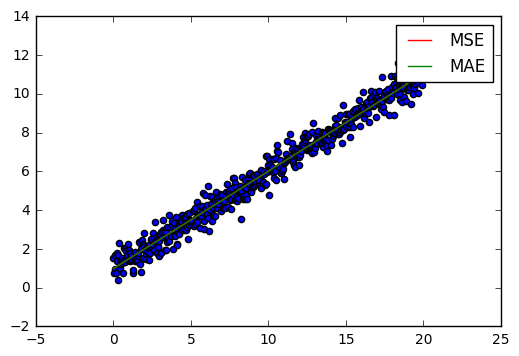

In [6]:
plot.scatter(sample[:,0], sample[:,1])
plot.plot([0, 20], [f(mse_res['x'], 0), f(mse_res['x'], 20)], color="red", label="MSE")
plot.plot([0, 20], [f(mae_res['x'], 0), f(mae_res['x'], 20)], color="green", label="MAE")
axis = plot.gca()
axis.legend()

Результат работы двух методов почти совпал

In [7]:
# Добавляем в выборку выбросы

bad_sample = [(x, y) for x, y in sample]
bad_sample.extend(
    (x, -1 + error)
    for x, error in zip(numpy.linspace(0, 20, 75), stats.norm.rvs(0, scale=numpy.sqrt(0.2), size=75))
)
bad_sample = numpy.array(bad_sample)

In [8]:
bad_mse_res = minimize(MSE, params_0, args=bad_sample)
bad_mae_res = minimize(MAE, params_0, args=bad_sample)

In [9]:
bad_mse_res

      fun: 3912.4300934651365
 hess_inv: array([[  5.08687064e-06,   2.54343441e-06],
       [  2.54343441e-06,   1.27171902e-06]])
      jac: array([  6.10351562e-05,   6.10351562e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 101
      nit: 5
     njev: 25
   status: 2
  success: False
        x: array([ 0.43651786,  0.73396264])

In [10]:
bad_mae_res

      fun: 701.0979762276734
 hess_inv: array([[  8.00268497e-10,  -6.03482983e-09],
       [ -6.03482983e-09,   4.44281658e-05]])
      jac: array([ 8.16593933,  0.72906494])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 588
      nit: 12
     njev: 144
   status: 2
  success: False
        x: array([ 0.50474867,  0.89132976])

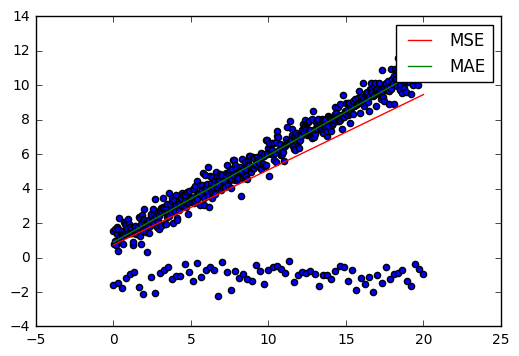

In [11]:
# Снова визуализируем и делаем вывод об устойчивости методов к выбросам

plot.scatter(bad_sample[:,0], bad_sample[:,1])
plot.plot([0, 20], [f(bad_mse_res['x'], 0), f(bad_mse_res['x'], 20)], color="red", label="MSE")
plot.plot([0, 20], [f(bad_mae_res['x'], 0), f(bad_mae_res['x'], 20)], color="green", label="MAE")
axis = plot.gca()
axis.legend()

Очевидно, MAE намного устойчивее к выбросам, чем  MSE